In [ ]:
%load_ext autoreload
%autoreload 2

# NLP - Natural Language Processing

> Natural Language Processing

In [ ]:
#| default_exp nlp

## Initial Checks

In [ ]:
#|eval: false
!conda list | grep "pytorch"

ffmpeg                    4.3                  hf484d3e_0    pytorch
libjpeg-turbo             2.0.0                h9bf148f_0    pytorch
pytorch                   2.0.1           py3.11_cuda11.8_cudnn8.7.0_0    pytorch
pytorch-cuda              11.8                 h7e8668a_5    pytorch
pytorch-ignite            0.4.12                   pypi_0    pypi
pytorch-lightning         2.0.7                    pypi_0    pypi
pytorch-mutex             1.0                        cuda    pytorch
torchaudio                2.0.2               py311_cu118    pytorch
torchtriton               2.0.0                     py311    pytorch
torchvision               0.15.2              py311_cu118    pytorch


In [ ]:
#|eval: false
!pip list | grep "fastai" 
!pip list | grep "fastbook"
!pip list | grep "ipywidgets"

fastai                        2.7.12
fastbook                      0.0.28
ipywidgets                    8.1.0


In [ ]:
#|eval: false
import torch

In [ ]:
#|eval: false
torch.cuda.is_available()

True

In [ ]:
#|eval: false
torch.cuda.device_count()

1

In [ ]:
#|eval: false
torch.cuda.get_device_capability()

(8, 6)

In [ ]:
#|eval: false
torch.cuda.current_device()

0

in the book, doing NLP using RNNs (recurrent neural networks). 

We are using transformers, using Hugging Face Transformers.


1. Wikitext - Language Model
2. IMDb - Language Model - use wikitest as pretraining
3. IMDb - Classifier - use IMDb as pretraining

```sh
!pip install kaggle
```

## Kaggle setup

In [ ]:
#|eval: false
import os

# for working with paths in Python, I recommend using `pathlib.Path`
from pathlib import Path

In [ ]:
#|eval: false
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

creds = '{"username":"bensonthekkel","key":"5d0c64462ee63521393fead641685ce8"}'

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [ ]:
#|eval: false
path = Path('us-patent-phrase-to-phrase-matching')
dataPath = Path(f'./Data/{path}')

In [ ]:
#|eval: false
if not iskaggle and not dataPath.exists():
    import zipfile,kaggle
    kaggle.api.competition_download_cli(str(path))
    zipfile.ZipFile(f'{path}.zip').extractall(dataPath)

In [ ]:
#|eval: false
file_path = f'{path}.zip'  # Replace with the actual path of the zip file

if os.path.exists(file_path):
    os.remove(file_path)
    print(f"File '{file_path}' has been deleted.")
else:
    print(f"File '{file_path}' does not exist.")

File 'us-patent-phrase-to-phrase-matching.zip' does not exist.


## Need libraries for data science

1. Numpy
2. Matplotlib
3. pandas
4. pytorch

In [ ]:
#|eval: false
import pandas as pd

In [ ]:
#|eval: false
df = pd.read_csv(dataPath/'train.csv')
df

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00
...,...,...,...,...,...
36468,8e1386cbefd7f245,wood article,wooden article,B44,1.00
36469,42d9e032d1cd3242,wood article,wooden box,B44,0.50
36470,208654ccb9e14fa3,wood article,wooden handle,B44,0.50
36471,756ec035e694722b,wood article,wooden material,B44,0.75


In [ ]:
#|eval: false
df.describe(include='object')

,id,anchor,target,context
count,36473,36473,36473,36473
unique,36473,733,29340,106
top,37d61fd2272659b1,component composite coating,composition,H01
freq,1,152,24,2186


In [ ]:
#|eval: false
df['input'] = 'TEXT1: ' + df.context + '; TEXT2: ' + df.target + '; ANC1: ' + df.anchor

In [ ]:
#|eval: false
df.input.head()

0    TEXT1: A47; TEXT2: abatement of pollution; ANC...
1    TEXT1: A47; TEXT2: act of abating; ANC1: abate...
2    TEXT1: A47; TEXT2: active catalyst; ANC1: abat...
3    TEXT1: A47; TEXT2: eliminating process; ANC1: ...
4    TEXT1: A47; TEXT2: forest region; ANC1: abatement
Name: input, dtype: object

## Tokenization

In [ ]:
#|eval: false
from datasets import Dataset,DatasetDict
from transformers import AutoModelForSequenceClassification,AutoTokenizer

In [ ]:
#|eval: false
ds = Dataset.from_pandas(df)
ds

Dataset({
    features: ['id', 'anchor', 'target', 'context', 'score', 'input'],
    num_rows: 36473
})

In [ ]:
#|eval: false
model_nm = 'microsoft/deberta-v3-small'
tokz = AutoTokenizer.from_pretrained(model_nm)
tokz.tokenize("G'day folks, I'm Jeremy from fast.ai!")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/home/thekkel/mambaforge/envs/cfast/lib/python3.11/site-packages/transformers/convert_slow_tokenizer.py:470: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


['▁G',
 "'",
 'day',
 '▁folks',
 ',',
 '▁I',
 "'",
 'm',
 '▁Jeremy',
 '▁from',
 '▁fast',
 '.',
 'ai',
 '!']

In [ ]:
#|eval: false
tokz.tokenize("A platypus is an ornithorhynchus anatinus.")

['▁A',
 '▁platypus',
 '▁is',
 '▁an',
 '▁or',
 'ni',
 'tho',
 'rhynch',
 'us',
 '▁an',
 'at',
 'inus',
 '.']

In [ ]:
#|eval: false
def tok_func(x): return tokz(x["input"])

In [ ]:
#|eval: false
tok_ds = ds.map(tok_func, batched=True)

Map:   0%|          | 0/36473 [00:00<?, ? examples/s]

In [ ]:
#|eval: false
row = tok_ds[0]
row['input'], row['input_ids']

('TEXT1: A47; TEXT2: abatement of pollution; ANC1: abatement',
 [1,
  54453,
  435,
  294,
  336,
  5753,
  346,
  54453,
  445,
  294,
  47284,
  265,
  6435,
  346,
  23702,
  435,
  294,
  47284,
  2])

In [ ]:
#|eval: false
tokz.vocab['▁of']

265

In [ ]:
#|eval: false
tok_ds = tok_ds.rename_columns({'score':'labels'})

In [ ]:
#|eval: false
eval_df = pd.read_csv(dataPath/'test.csv')
eval_df.describe()

,id,anchor,target,context
count,36,36,36,36
unique,36,34,36,29
top,4112d61851461f60,el display,inorganic photoconductor drum,G02
freq,1,2,1,3


In [ ]:
#|eval: false
dds = tok_ds.train_test_split(0.25, seed=42)
dds

DatasetDict({
    train: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'labels', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 27354
    })
    test: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'labels', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9119
    })
})

In [ ]:
#|eval: false
eval_df['input'] = 'TEXT1: ' + eval_df.context + '; TEXT2: ' + eval_df.target + '; ANC1: ' + eval_df.anchor
eval_ds = Dataset.from_pandas(eval_df).map(tok_func, batched=True)

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

## Understanding Overfitting

In [ ]:
#|eval: false
from fastAIcourse.neuralnet import *

In [ ]:
def f(x): return -3*x**2 + 2*x + 20

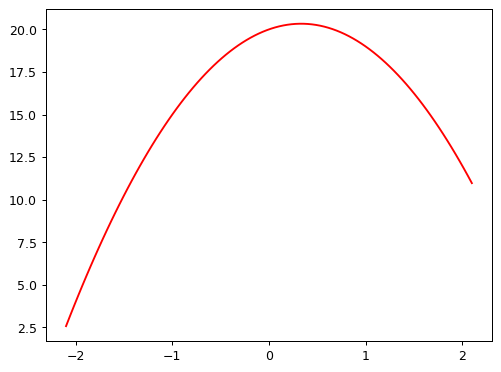

In [ ]:
#|eval: false
plot_function(f)

In [ ]:
#|eval: false
from numpy.random import normal,seed,uniform
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#|eval: false
np.random.seed(42)

In [ ]:
def noise(x, scale): return normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

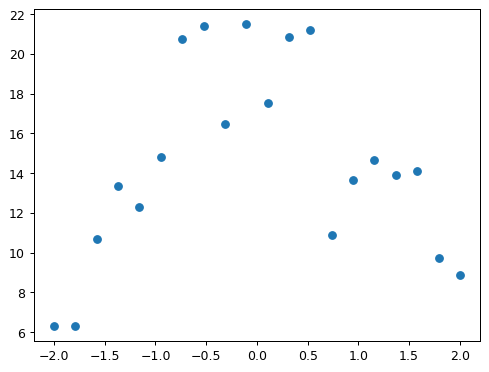

In [ ]:
#|eval: false
x = np.linspace(-2, 2, num=20)[:,None]
y = add_noise(f(x), 0.2, 1.3)
plt.scatter(x,y);

In [ ]:
#|eval: false
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
#|eval: false
def plot_poly(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x, y)
    plt.scatter(x,y)
    plot_function(model.predict)

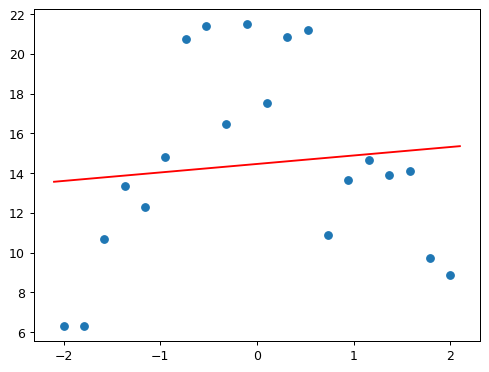

In [ ]:
#|eval: false
plot_poly(1)

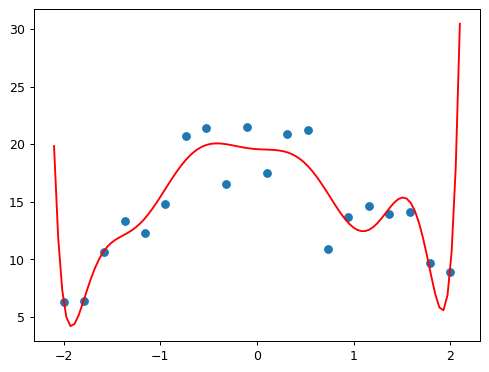

In [ ]:
#|eval: false
plot_poly(10)

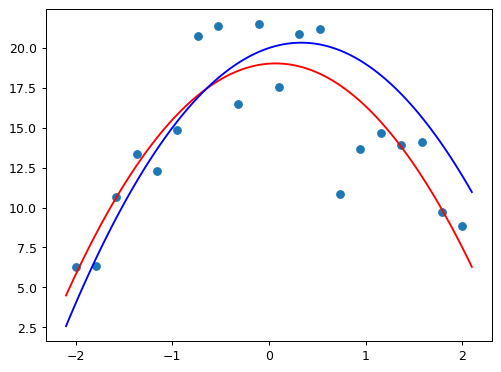

In [ ]:
#|eval: false
plot_poly(2)
plot_function(f, color='b')

## Validation Set

FastAI always uses a validation set.
HUgging face is also good

### Creating a good validation set

- be careful of randow data split (sin functions)
- be careful of cross-validation
- be careful of overfitting in the validation set

### Test set

- basically another validation set
- ex. trying 180 models will give you a good accuracy for some validation set by chance or coincidence
- Hence, test set for the real test

Metrics
- accruacy
- error
- pearson correlation coefficient

`metrics is not same as loss function`
- loss function used for calculating gradient descent
- if using accuracy, function is too bumpy
- we want a function that is nice and smooth like average absolute error, mean absolute error

loss function 
- average absolute error
- mean absolute error

In real life, trial and error

## Pearson Correlation Coefficient 

In [ ]:
#|eval: false
from sklearn.datasets import fetch_california_housing

In [ ]:
#|eval: false
housing = fetch_california_housing(as_frame=True)
housing = housing['data'].join(housing['target']).sample(1000, random_state=52)
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
7506,3.0550,37.0,5.152778,1.048611,729.0,5.062500,33.92,-118.28,1.054
4720,3.0862,35.0,4.697897,1.055449,1159.0,2.216061,34.05,-118.37,3.453
12888,2.5556,24.0,4.864905,1.129222,1631.0,2.395007,38.66,-121.35,1.057
13344,3.0057,32.0,4.212687,0.936567,1378.0,5.141791,34.05,-117.64,0.969
7173,1.9083,42.0,3.888554,1.039157,1535.0,4.623494,34.05,-118.19,1.192


In [ ]:
#|eval: false
np.set_printoptions(precision=2, suppress=True)
np.corrcoef(housing, rowvar=False)

array([[ 1.  , -0.12,  0.43, -0.08,  0.01, -0.07, -0.12,  0.04,  0.68],
       [-0.12,  1.  , -0.17, -0.06, -0.31,  0.  ,  0.03, -0.13,  0.12],
       [ 0.43, -0.17,  1.  ,  0.76, -0.09, -0.07,  0.12, -0.03,  0.21],
       [-0.08, -0.06,  0.76,  1.  , -0.08, -0.07,  0.09,  0.  , -0.04],
       [ 0.01, -0.31, -0.09, -0.08,  1.  ,  0.16, -0.15,  0.13,  0.  ],
       [-0.07,  0.  , -0.07, -0.07,  0.16,  1.  , -0.16,  0.17, -0.27],
       [-0.12,  0.03,  0.12,  0.09, -0.15, -0.16,  1.  , -0.93, -0.16],
       [ 0.04, -0.13, -0.03,  0.  ,  0.13,  0.17, -0.93,  1.  , -0.03],
       [ 0.68,  0.12,  0.21, -0.04,  0.  , -0.27, -0.16, -0.03,  1.  ]])

In [ ]:
#|eval: false
np.corrcoef(housing.MedInc, housing.MedHouseVal)

array([[1.  , 0.68],
       [0.68, 1.  ]])

In [ ]:
def corr(x,y): return np.corrcoef(x,y)[0][1]

def show_corr(df, a, b):
    x,y = df[a],df[b]
    plt.scatter(x,y, alpha=0.5, s=4)
    plt.title(f'{a} vs {b}; r: {corr(x, y):.2f}')

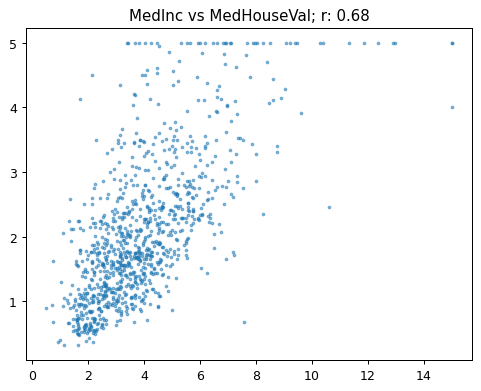

In [ ]:
#|eval: false
corr(housing.MedInc, housing.MedHouseVal)
show_corr(housing, 'MedInc', 'MedHouseVal')

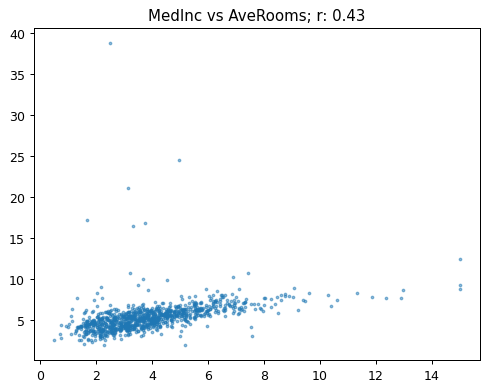

In [ ]:
#|eval: false
show_corr(housing, 'MedInc', 'AveRooms')

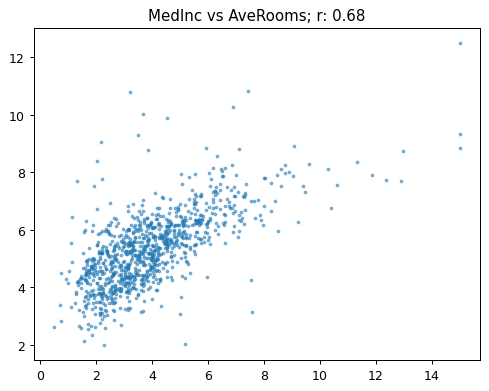

In [ ]:
#|eval: false
subset = housing[housing.AveRooms<15]
show_corr(subset, 'MedInc', 'AveRooms')

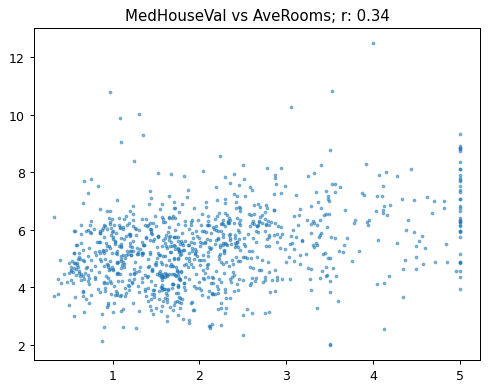

In [ ]:
#|eval: false
show_corr(subset, 'MedHouseVal', 'AveRooms')

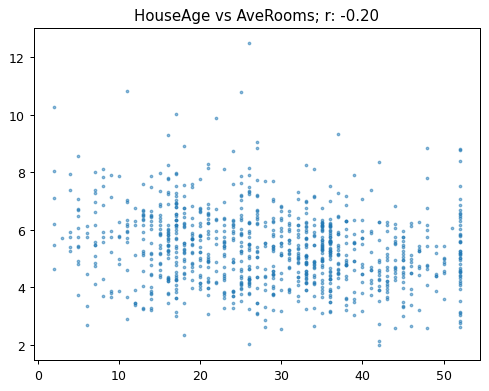

In [ ]:
#|eval: false
show_corr(subset, 'HouseAge', 'AveRooms')

In [ ]:
def corr_d(eval_pred): return {'pearson': corr(*eval_pred)}

## Training our Model

To train a model in Transformers we'll need this:

In [ ]:
#|eval: false
from transformers import TrainingArguments,Trainer

We pick a batch size that fits our GPU, and small number of epochs so we can run experiments quickly:

In [ ]:
bs = 128
epochs = 5

The most important hyperparameter is the learning rate. fastai provides a learning rate finder to help you figure this out, but Transformers doesn't, so you'll just have to use trial and error. The idea is to find the largest value you can, but which doesn't result in training failing.

In [ ]:
#|eval: false
lr = 8e-5

Transformers uses the TrainingArguments class to set up arguments. Don't worry too much about the values we're using here -- they should generally work fine in most cases. It's just the 3 parameters above that you may need to change for different models.

In [ ]:
#|eval: false
args = TrainingArguments('outputs', learning_rate=lr,
                         warmup_ratio=0.1,
                         lr_scheduler_type='cosine',
                         fp16=True,
                         evaluation_strategy="epoch",
                         per_device_train_batch_size=bs,
                         per_device_eval_batch_size=bs*2,
                         num_train_epochs=epochs,
                         weight_decay=0.01,
                         report_to='none'
                        )

We can now create our model, and Trainer, which is a class which combines the data and model together (just like Learner in fastai):

In [ ]:
#|eval: false
model = AutoModelForSequenceClassification.from_pretrained(model_nm,
                                                           num_labels=1
                                                          )
trainer = Trainer(model,
                  args,
                  train_dataset=dds['train'],
                  eval_dataset=dds['test'],
                  tokenizer=tokz,
                  compute_metrics=corr_d
                 )

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.weight', 'pooler.dense.bias', 'classifier.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#|eval: false
trainer.train();

Epoch,Training Loss,Validation Loss,Pearson
1,No log,0.026428,0.798456
2,No log,0.022390,0.816690
3,0.067100,0.020840,0.831976
4,0.067100,0.023073,0.836452
5,0.012600,0.022499,0.837132


In [ ]:
#|eval: false
preds = trainer.predict(eval_ds).predictions.astype(float)
preds

array([[ 0.59],
       [ 0.68],
       [ 0.55],
       [ 0.31],
       [-0.01],
       [ 0.5 ],
       [ 0.58],
       [-0.02],
       [ 0.3 ],
       [ 1.12],
       [ 0.27],
       [ 0.23],
       [ 0.76],
       [ 0.98],
       [ 0.77],
       [ 0.45],
       [ 0.35],
       [-0.01],
       [ 0.76],
       [ 0.38],
       [ 0.49],
       [ 0.25],
       [ 0.13],
       [ 0.24],
       [ 0.59],
       [-0.01],
       [-0.01],
       [-0.02],
       [-0.  ],
       [ 0.54],
       [ 0.35],
       [ 0.02],
       [ 0.71],
       [ 0.55],
       [ 0.44],
       [ 0.22]])

In [ ]:
#|eval: false
preds = np.clip(preds, 0, 1)

In [ ]:
#|eval: false
preds

array([[0.59],
       [0.68],
       [0.55],
       [0.31],
       [0.  ],
       [0.5 ],
       [0.58],
       [0.  ],
       [0.3 ],
       [1.  ],
       [0.27],
       [0.23],
       [0.76],
       [0.98],
       [0.77],
       [0.45],
       [0.35],
       [0.  ],
       [0.76],
       [0.38],
       [0.49],
       [0.25],
       [0.13],
       [0.24],
       [0.59],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.54],
       [0.35],
       [0.02],
       [0.71],
       [0.55],
       [0.44],
       [0.22]])

In [ ]:
#|eval: false
import datasets

In [ ]:
#|eval: false
submission = datasets.Dataset.from_dict({
    'id': eval_ds['id'],
    'score': preds
})

submission.to_csv('Data/submission.csv', index=False)

Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

855